In [25]:
# Importing required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import joblib

In [26]:
# Load the dataset
file_path = "data.csv"
data = pd.read_csv(file_path)

In [27]:
data

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [28]:
# Display basic info and summary
print(data.info())
print(data.describe())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB
None
          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000  

In [29]:
# Check for missing values
print(data.isnull().sum())

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


In [30]:
# Distribution of numeric columns
fig = make_subplots(rows=5, cols=2, subplot_titles=data.columns)
for i, column in enumerate(data.columns):
    row = i // 2 + 1
    col = i % 2 + 1
    hist = px.histogram(data, x=column, template='plotly_dark', color_discrete_sequence=['#F63366'])
    hist.update_traces(marker_line_width=0.5, marker_line_color="white")
    fig.add_trace(hist.data[0], row=row, col=col)

fig.update_layout(height=1200, title_text="Distribution of Numeric Columns", title_font=dict(size=25), title_x=0.5, showlegend=False)
fig.show()

In [31]:

# Correlation Heatmap
corr = data.corr()
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True,
    colorscale='Viridis')
fig.update_layout(title_text='Correlation Heatmap', title_font=dict(size=25), title_x=0.5)
fig.show()

In [32]:
# Boxplots for each feature to identify outliers
fig = make_subplots(rows=5, cols=2, subplot_titles=data.columns[:-1])
for i, column in enumerate(data.columns[:-1]):  # Excluding the target column 'fail'
    row = i // 2 + 1
    col = i % 2 + 1
    box = px.box(data, y=column, template='plotly_dark', color_discrete_sequence=['#636EFA'])
    box.update_traces(marker_line_width=0.5, marker_line_color="white")
    fig.add_trace(box.data[0], row=row, col=col)

fig.update_layout(height=1200, title_text="Boxplots of Features", title_font=dict(size=25), title_x=0.5, showlegend=False)
fig.show()

In [33]:
# Scatter plots to visualize relationships between features and target
fig = make_subplots(rows=5, cols=2, subplot_titles=data.columns[:-1])
for i, column in enumerate(data.columns[:-1]):  # Excluding the target column 'fail'
    row = i // 2 + 1
    col = i % 2 + 1
    scatter = px.scatter(data, x=column, y='fail', template='plotly_dark', color='fail', color_continuous_scale='Viridis')
    scatter.update_traces(marker=dict(size=5, opacity=0.7, line=dict(width=0.5, color='white')))
    fig.add_trace(scatter.data[0], row=row, col=col)

fig.update_layout(height=1200, title_text="Scatter Plots of Features vs Fail", title_font=dict(size=25), title_x=0.5, showlegend=False)
fig.show()

In [34]:
# Data Preprocessing
X = data.drop(columns=['fail'])
y = data['fail']

In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X_train

array([[-0.26732955, -0.29047016,  1.8729485 , ..., -1.14744445,
        -0.35930553, -0.37199051],
       [-0.28719126,  0.83996783, -0.21579023, ...,  2.64639645,
        -2.26077051, -1.86148699],
       [-0.28719126,  0.83996783,  0.48045602, ...,  1.02046464,
        -1.62694885, -0.2064909 ],
       ...,
       [-0.26642674,  0.46315516,  1.17670226, ...,  0.11716918,
         0.9083378 ,  1.11750597],
       [-0.1878827 ,  1.21678049, -0.21579023, ...,  1.743101  ,
        -0.35930553,  0.12450831],
       [-0.21135563,  1.21678049, -0.21579023, ...,  1.20112373,
        -1.62694885, -1.53048777]])

In [38]:
X_test

array([[-0.27274638,  1.21678049,  0.48045602, ...,  2.10441918,
        -0.99312719, -1.69598738],
       [-0.2592043 , -0.29047016, -0.21579023, ..., -1.08722475,
         1.54215946, -0.37199051],
       [-0.2411482 ,  0.0863425 ,  1.17670226, ...,  1.26134342,
        -0.99312719,  0.95200636],
       ...,
       [-0.10663025, -1.42090814,  0.48045602, ...,  0.53870706,
        -0.35930553, -1.36498816],
       [-0.2583015 ,  0.46315516, -0.91203647, ...,  1.08068433,
        -2.26077051, -1.86148699],
       [-0.28628845, -1.42090814,  1.17670226, ..., -1.02700505,
         0.27451614, -0.53749012]])

In [39]:
# Model Training and Hyperparameter Tuning
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(probability=True)
}

params = {
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10]},
    'SVM': {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

In [40]:
best_models = {}
best_accuracy = 0
best_model_name = ''
best_model = None

for model_name in models.keys():
    grid = GridSearchCV(models[model_name], params[model_name], cv=5, n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    y_pred = grid.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = grid.best_estimator_

print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for RandomForest: {'max_depth': None, 'n_estimators': 50}
Accuracy for RandomForest: 0.8888888888888888
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'n_estimators': 50}
Accuracy for GradientBoosting: 0.8888888888888888
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for LogisticRegression: {'C': 0.01}
Accuracy for LogisticRegression: 0.8783068783068783
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for SVM: {'C': 0.01, 'kernel': 'linear'}
Accuracy for SVM: 0.8783068783068783

Best model: RandomForest with accuracy: 0.8888888888888888


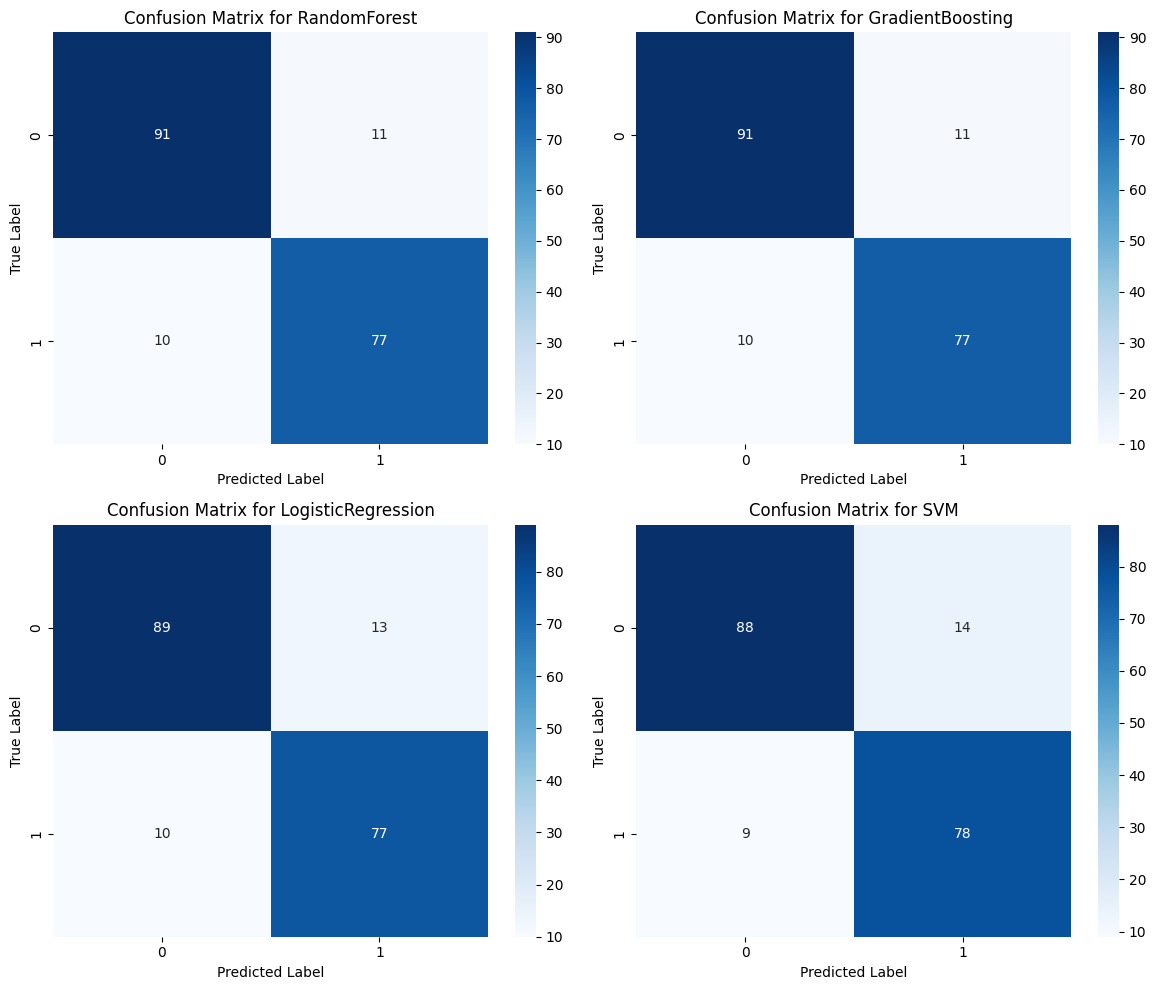

In [44]:
# Comparing model performances w.r.t confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (model_name, model) in enumerate(best_models.items()):
    row = i // 2
    col = i % 2
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[row, col])
    axes[row, col].set_title(f'Confusion Matrix for {model_name}')
    axes[row, col].set_xlabel('Predicted Label')
    axes[row, col].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [15]:
# Evaluation of the best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

In [16]:

# Plot confusion matrix
fig = px.imshow(cm, text_auto=True, color_continuous_scale='Blues', template='plotly_dark')
fig.update_layout(title_text=f'Confusion Matrix for {best_model_name}', title_font=dict(size=25), title_x=0.5)
fig.show()

In [17]:

# Print classification report
report_df = pd.DataFrame(report).transpose()
print(f'Classification Report for {best_model_name}')
print(report_df)

Classification Report for GradientBoosting
              precision    recall  f1-score     support
0              0.900990  0.892157  0.896552  102.000000
1              0.875000  0.885057  0.880000   87.000000
accuracy       0.888889  0.888889  0.888889    0.888889
macro avg      0.887995  0.888607  0.888276  189.000000
weighted avg   0.889026  0.888889  0.888933  189.000000


In [18]:
# ROC Curve and AUC for the best model
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'{best_model_name} (AUC = {roc_auc:.2f})', line=dict(width=2)))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash', color='gray'), name='Random'))
fig.update_layout(title_text='Receiver Operating Characteristic', title_font=dict(size=25), xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', template='plotly_dark')
fig.show()

In [19]:
roc_auc

0.9568965517241379

# Receiver Operating Characteristic (ROC) Curve

## Interpretation

The ROC curve displayed above shows the performance of the **RandomForest** classifier on the test dataset. The curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

### Key Points:

- **True Positive Rate (TPR)**: Also known as Sensitivity or Recall, it is the ratio of correctly predicted positive observations to the actual positives.
- **False Positive Rate (FPR)**: It is the ratio of incorrectly predicted positive observations to the actual negatives.

### Analysis:

- The **RandomForest** classifier achieves an Area Under the Curve (AUC) of **0.95**, indicating excellent performance.
- A perfect classifier would have an AUC of **1.0**, while a classifier with no discriminative power would have an AUC of **0.5** (represented by the dashed line labeled "Random").
- The ROC curve is very close to the top left corner, demonstrating that the model has a high TPR and a low FPR, meaning it correctly identifies a large proportion of positive cases while keeping false positives to a minimum.

### Conclusion:

The **RandomForest** classifier demonstrates strong performance in distinguishing between the classes, with an AUC of **0.95**. This high AUC value indicates that the model is highly effective at predicting machine failures in advance.